In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import matplotlib.pylab as plt
import seaborn as sns
import time
from datetime import datetime # 转换时间

In [5]:
def plot_learning_curve(estimator, title, X, y, 
                        ax,
                        ylim = None,
                        cv=None,
                        n_jobs = None
                       ):
    train_size, train_scores, test_scores = learning_curve(estimator=estimator
                                                           ,X = X, y = y, cv = cv, n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_ylabel("Score")
    ax.set_xlabel("Training exaples")
    
    # 设置网格，易于观察
    ax.grid()
    ax.plot(train_size, np.mean(train_scores, axis=1), "o-", label = "Training Score", color="r")
    ax.plot(train_size, np.mean(test_scores, axis=1), "o-", label = "Testing Score", color="g")
    ax.legend()
    return ax
    

Naive Bayes:00:01:359550
DecisionTree:00:01:208171
SVM, RBF kernel:00:09:983777
RandomForest:00:13:722504
Logistic:00:12:544988


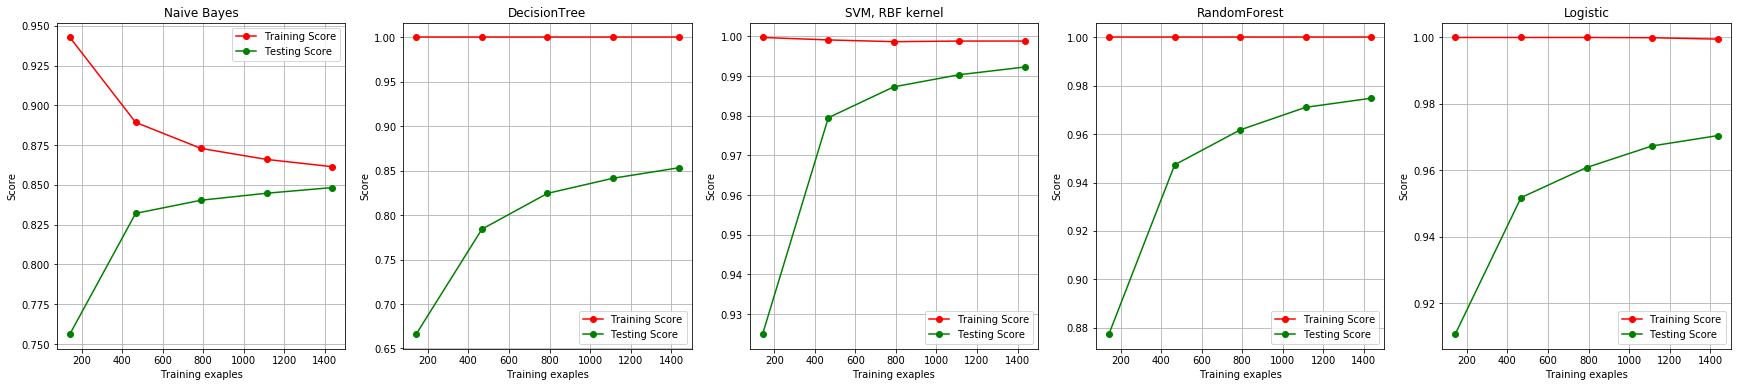

In [9]:
digits = load_digits()
X, y = digits.data, digits.target
titles = ["Naive Bayes","DecisionTree" ,"SVM, RBF kernel" ,"RandomForest" ,"Logistic"]
models = [GaussianNB() ,DTC() ,SVC(gamma=0.001) ,RFC(n_estimators=50) ,LR(C=.1,solver="lbfgs")]

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
fig, axes = plt.subplots(1, 5, figsize=(30, 6))

for ind, title, model in zip(range(len(titles)),titles,  models):
    t0 = time.time()
    plot_learning_curve(model, title,X, y, ax=axes[ind], cv = cv, n_jobs=4)
    print("{}:{}".format(title, datetime.fromtimestamp(time.time()-t0).strftime("%M:%S:%f")))
plt.show()

**结论：**在这个对比之下，我们可以看出：贝叶斯是速度很快，但分类效果一般，并且初次训练之后的结果就很接近算法极限
的算法，几乎没有调参的余地。也就是说，如果我们追求对概率的预测，并且希望越准确越好，那我们应该先选择逻
辑回归。如果数据十分复杂，或者是稀疏矩阵，那我们坚定地使用贝叶斯。如果我们分类的目标不是要追求对概率的
预测，那我们完全可以先试试看高斯朴素贝叶斯的效果（反正它运算很快速，还不需要太多的样本），如果效果很不
错，我们就很幸运地得到了一个表现优秀又快速的模型。如果我们没有得到比较好的结果，那我们完全可以选择再更
换成更加复杂的模型

## 知识点
学习曲线是不同训练集大小，模型在训练集和验证集上的得分变化曲线。也就是以样本数为横坐标，训练和交叉验证集上的得分（如准确率）为纵坐标。learning
curve可以帮助我们判断模型现在所处的状态：过拟合（overfiting / high variance） or 欠拟合（underfitting /
high bias）